In [167]:
%matplotlib inline

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [191]:
# upperbond file process
upperbond_file='data/pubmedbert-upperbond.csv'
upperbond=pd.read_csv(upperbond_file)
all_baselines=pd.read_csv('data/final_results.csv')

In [192]:
upperbond

,Name,test_f1,entity_name,do_remove_entity,best_dev_f1,State,Notes,User,Tags,Created,...,dev_recall,epoch,eval_loss,loss,lr,test_precision,test_recall,train instances,entity_removal_rate,entity_removal_method
0,super-tree-16,0.776231,Gene,False,0.767682,finished,-,possible961,NaN,2022-10-14T19:18:53.000Z,...,0.798276,19,0.218538,1.033830e-06,0,0.751694,0.802423,74905,0.1,remove_annotations_randomly
1,divine-universe-15,0.879305,Chemical,False,0.871344,finished,-,possible961,NaN,2022-10-14T19:18:53.000Z,...,0.893167,19,0.101330,1.076492e-08,0,0.865692,0.893353,99037,0.1,remove_annotations_randomly
2,vibrant-galaxy-13,0.851693,Disease,False,0.849235,finished,-,possible961,NaN,2022-10-14T19:18:42.000Z,...,0.866866,19,0.133246,1.663478e-08,0,0.843068,0.860496,16895,0.1,remove_annotations_randomly
3,sleek-sun-14,0.709802,CellLine,False,0.749460,finished,-,possible961,NaN,2022-10-14T19:18:42.000Z,...,0.746667,19,0.090561,9.126352e-08,0,0.685629,0.735743,12592,0.1,remove_annotations_randomly
4,sparkling-valley-12,0.772553,Species,False,0.815430,finished,-,possible961,NaN,2022-10-14T19:18:42.000Z,...,0.847102,19,0.069335,2.443665e-08,0,0.772822,0.772284,15195,0.1,remove_annotations_randomly


In [193]:
all_baselines.describe(include='all')

,entity_name,entity_removal_method,entity_removal_rate,number_of_annotations,number_of_surfaceforms,number_of_entity_annotations_after_removal,number_of_surfaceforms_after_removal,test_precision,test_recall,test_f1,seed,Model,erosion_rate,misguidance_rate
count,1800,1800,1800.000000,900.000000,900.000000,900.000000,900.000000,1800.000000,1800.000000,1800.000000,1800.0000,1800,1800.000000,1795.000000
unique,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,Gene,remove_annotations_randomly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BiLSTM-Partial-CRF,NaN,NaN
freq,360,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN,NaN
mean,NaN,NaN,0.500000,43879.800000,13048.200000,22039.131111,7795.625556,0.686076,0.628431,0.618825,31.0000,NaN,0.225632,0.057572
std,NaN,NaN,0.258271,46056.325952,13089.754168,28325.046601,9557.787651,0.126026,0.243760,0.192965,14.8702,NaN,0.228209,2.223631
min,NaN,NaN,0.100000,2500.000000,1419.000000,250.000000,86.000000,0.000000,0.000000,0.000000,0.0000,NaN,-0.003855,-82.851877
25%,NaN,NaN,0.300000,5290.000000,1567.000000,1997.000000,893.500000,0.588067,0.486631,0.542876,20.0000,NaN,0.065274,-0.020939
50%,NaN,NaN,0.500000,14227.000000,4238.000000,7142.500000,2234.000000,0.711793,0.714240,0.657265,41.0000,NaN,0.138605,0.039924
75%,NaN,NaN,0.700000,82803.000000,28109.000000,35174.500000,13797.250000,0.784768,0.820220,0.759903,42.0000,NaN,0.298724,0.278663


In [194]:
# set entity type 
Entity_Category_list=['Disease','CellLine','Species','Chemical','Gene']
entity_removal_algorithm_list=['remove_annotations_randomly','remove_surfaceforms_randomly']
removal_algorithm_map={"remove_surfaceforms_randomly":'RSFR',"remove_annotations_randomly":"RAR"}
entity_type_map={"Disease":'Diseases','CellLine':'Cell Lines','Species':'Species','Chemical':'Chemicals','Gene':'Genes'}

In [195]:
all_baselines['Model'].value_counts()

BiLSTM-Partial-CRF           450
PubMedBERT                   450
EER-PubMedBERT               450
TS-PubMedBERT-Partial-CRF    450
Name: Model, dtype: int64

In [196]:
all_baselines.columns

Index(['entity_name', 'entity_removal_method', 'entity_removal_rate',
       'number_of_annotations', 'number_of_surfaceforms',
       'number_of_entity_annotations_after_removal',
       'number_of_surfaceforms_after_removal', 'test_precision', 'test_recall',
       'test_f1', 'seed', 'Model', 'erosion_rate', 'misguidance_rate'],
      dtype='object')

In [197]:
category_algorithm_combination=[[Entity_Category,entity_removal_algorithm] for Entity_Category in Entity_Category_list for entity_removal_algorithm in entity_removal_algorithm_list]
category_algorithm_combination

[['Disease', 'remove_annotations_randomly'],
 ['Disease', 'remove_surfaceforms_randomly'],
 ['CellLine', 'remove_annotations_randomly'],
 ['CellLine', 'remove_surfaceforms_randomly'],
 ['Species', 'remove_annotations_randomly'],
 ['Species', 'remove_surfaceforms_randomly'],
 ['Chemical', 'remove_annotations_randomly'],
 ['Chemical', 'remove_surfaceforms_randomly'],
 ['Gene', 'remove_annotations_randomly'],
 ['Gene', 'remove_surfaceforms_randomly']]

In [198]:
upperbond_dict = upperbond.set_index('entity_name')['test_f1'].to_dict()
def calculate_erosion_rate(row):
    entity = row['entity_name']
    upperbond_f1 = upperbond_dict[entity]
    baseline_f1 = row['test_f1']
    erosion_rate = (upperbond_f1 - baseline_f1) / upperbond_f1
    return erosion_rate

def calculate_misguidance_rate(row):
    entity = row['entity_name']
    removal_method= row['entity_removal_method']
    removal_rate= row['entity_removal_rate']
    pubmebnbert_test_f1= all_baselines[(all_baselines['entity_name']==entity) & (all_baselines['entity_removal_method']==removal_method) &(all_baselines['entity_removal_rate']==removal_rate) &(all_baselines['Model']=='PubMedBERT')]['test_f1'].mean()
    baseline_f1 = row['test_f1']
    misguidance_rate = (baseline_f1 - pubmebnbert_test_f1) / baseline_f1 
    return  misguidance_rate 

all_baselines['erosion_rate'] = all_baselines.apply(calculate_erosion_rate, axis=1)
all_baselines['misguidance_rate'] = all_baselines.apply(calculate_misguidance_rate, axis=1)

/tmp/ipykernel_5287/2967278578.py:15: RuntimeWarning: invalid value encountered in scalar divide
  misguidance_rate = (baseline_f1 - pubmebnbert_test_f1) / baseline_f1


In [199]:
all_baselines.describe(include='all')

,entity_name,entity_removal_method,entity_removal_rate,number_of_annotations,number_of_surfaceforms,number_of_entity_annotations_after_removal,number_of_surfaceforms_after_removal,test_precision,test_recall,test_f1,seed,Model,erosion_rate,misguidance_rate
count,1800,1800,1800.000000,900.000000,900.000000,900.000000,900.000000,1800.000000,1800.000000,1800.000000,1800.0000,1800,1800.000000,1795.000000
unique,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN
top,Gene,remove_annotations_randomly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BiLSTM-Partial-CRF,NaN,NaN
freq,360,900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450,NaN,NaN
mean,NaN,NaN,0.500000,43879.800000,13048.200000,22039.131111,7795.625556,0.686076,0.628431,0.618825,31.0000,NaN,0.225632,0.057572
std,NaN,NaN,0.258271,46056.325952,13089.754168,28325.046601,9557.787651,0.126026,0.243760,0.192965,14.8702,NaN,0.228209,2.223631
min,NaN,NaN,0.100000,2500.000000,1419.000000,250.000000,86.000000,0.000000,0.000000,0.000000,0.0000,NaN,-0.003855,-82.851877
25%,NaN,NaN,0.300000,5290.000000,1567.000000,1997.000000,893.500000,0.588067,0.486631,0.542876,20.0000,NaN,0.065274,-0.020939
50%,NaN,NaN,0.500000,14227.000000,4238.000000,7142.500000,2234.000000,0.711793,0.714240,0.657265,41.0000,NaN,0.138605,0.039924
75%,NaN,NaN,0.700000,82803.000000,28109.000000,35174.500000,13797.250000,0.784768,0.820220,0.759903,42.0000,NaN,0.298724,0.278663


In [200]:
all_baselines['Model'].unique()

array(['BiLSTM-Partial-CRF', 'PubMedBERT', 'EER-PubMedBERT',
       'TS-PubMedBERT-Partial-CRF'], dtype=object)

In [201]:

def ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,dataframe,column_y):
    cur_data=dataframe[(dataframe['entity_removal_method']==entity_removal_algorithm) &(dataframe['entity_name']==Entity_Category)]
    seaborn.lineplot(ax=ax,data=cur_data,style="Model",markers=True,dashes=False,x='entity_removal_rate',y=column_y,\
        hue='Model',err_style='band',hue_order=all_baselines['Model'].unique())
    abbr_algorithm=removal_algorithm_map[entity_removal_algorithm]
    ax.legend(loc='upper left',fontsize=20)
    ax.set_xlabel('Entity Removal Rate',fontsize=20)
    ax.set_ylabel(column_y.replace('_',' ').title(),fontsize=20)
    ax.set_xticks(np.arange(0,1.0,0.1))
    ax.set_yticks(np.arange(0,1.0,0.1))
    ax.tick_params(axis='x',labelsize=15)
    ax.tick_params(axis='y',labelsize=20)
    ax.set_title(f'Entity Type: {entity_type_map[Entity_Category]}; Entity Removal Scheme: {abbr_algorithm}',fontsize=20)

current entity category is Disease, current entity removal algorithm is remove_annotations_randomly
current entity category is Disease, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is CellLine, current entity removal algorithm is remove_annotations_randomly
current entity category is CellLine, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Species, current entity removal algorithm is remove_annotations_randomly
current entity category is Species, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Chemical, current entity removal algorithm is remove_annotations_randomly
current entity category is Chemical, current entity removal algorithm is remove_surfaceforms_randomly
current entity category is Gene, current entity removal algorithm is remove_annotations_randomly
current entity category is Gene, current entity removal algorithm is remove_surfaceforms_random

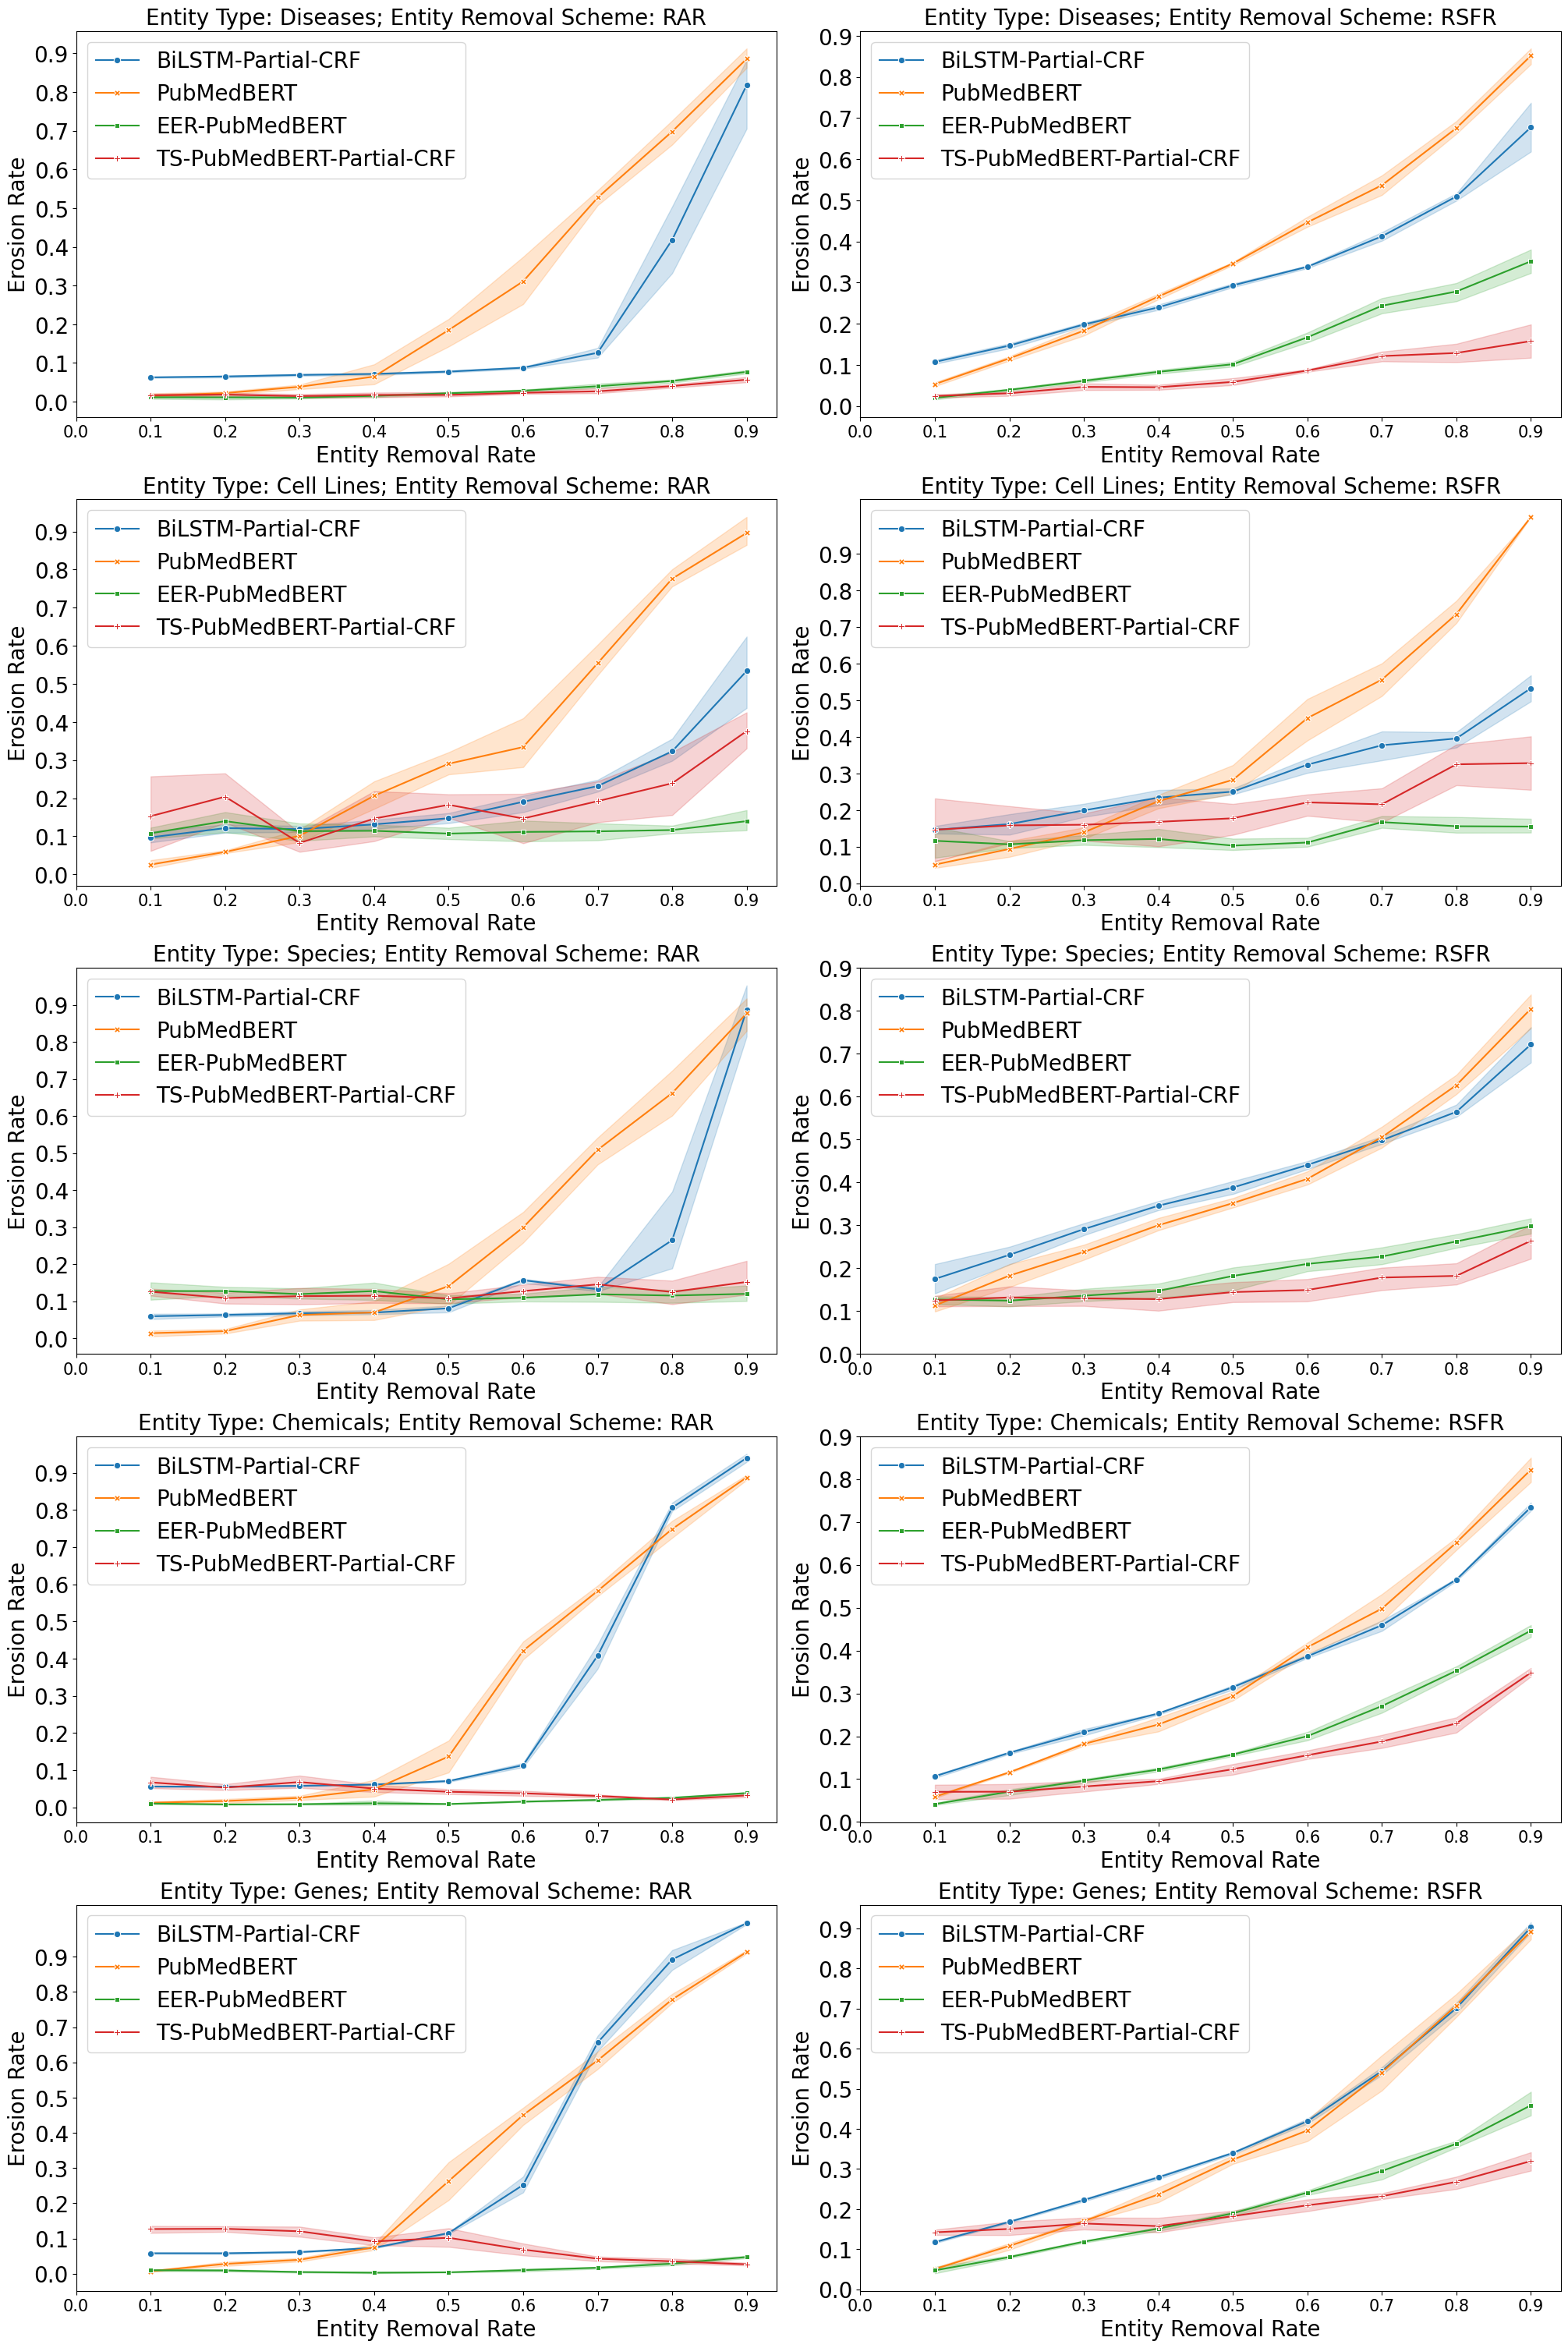

In [202]:
fig,axs=plt.subplots(nrows=5,ncols=2,figsize=(20,30),constrained_layout=True)
category_algorithm_combination=[[Entity_Category,entity_removal_algorithm] for Entity_Category in Entity_Category_list for entity_removal_algorithm in entity_removal_algorithm_list]
for ax,combi in zip(axs.flat,category_algorithm_combination):
        Entity_Category=combi[0]
        entity_removal_algorithm=combi[1]
        print(f'current entity category is {Entity_Category}, current entity removal algorithm is {entity_removal_algorithm}')
        ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,all_baselines,column_y='erosion_rate')

plt.savefig(f"figures/erosion_rate.pdf",dpi=1000)


current entity category is Disease, current entity removal algorithm is remove_annotations_randomly


ValueError: The palette dictionary is missing keys: {'EER-PubMedBERT'}

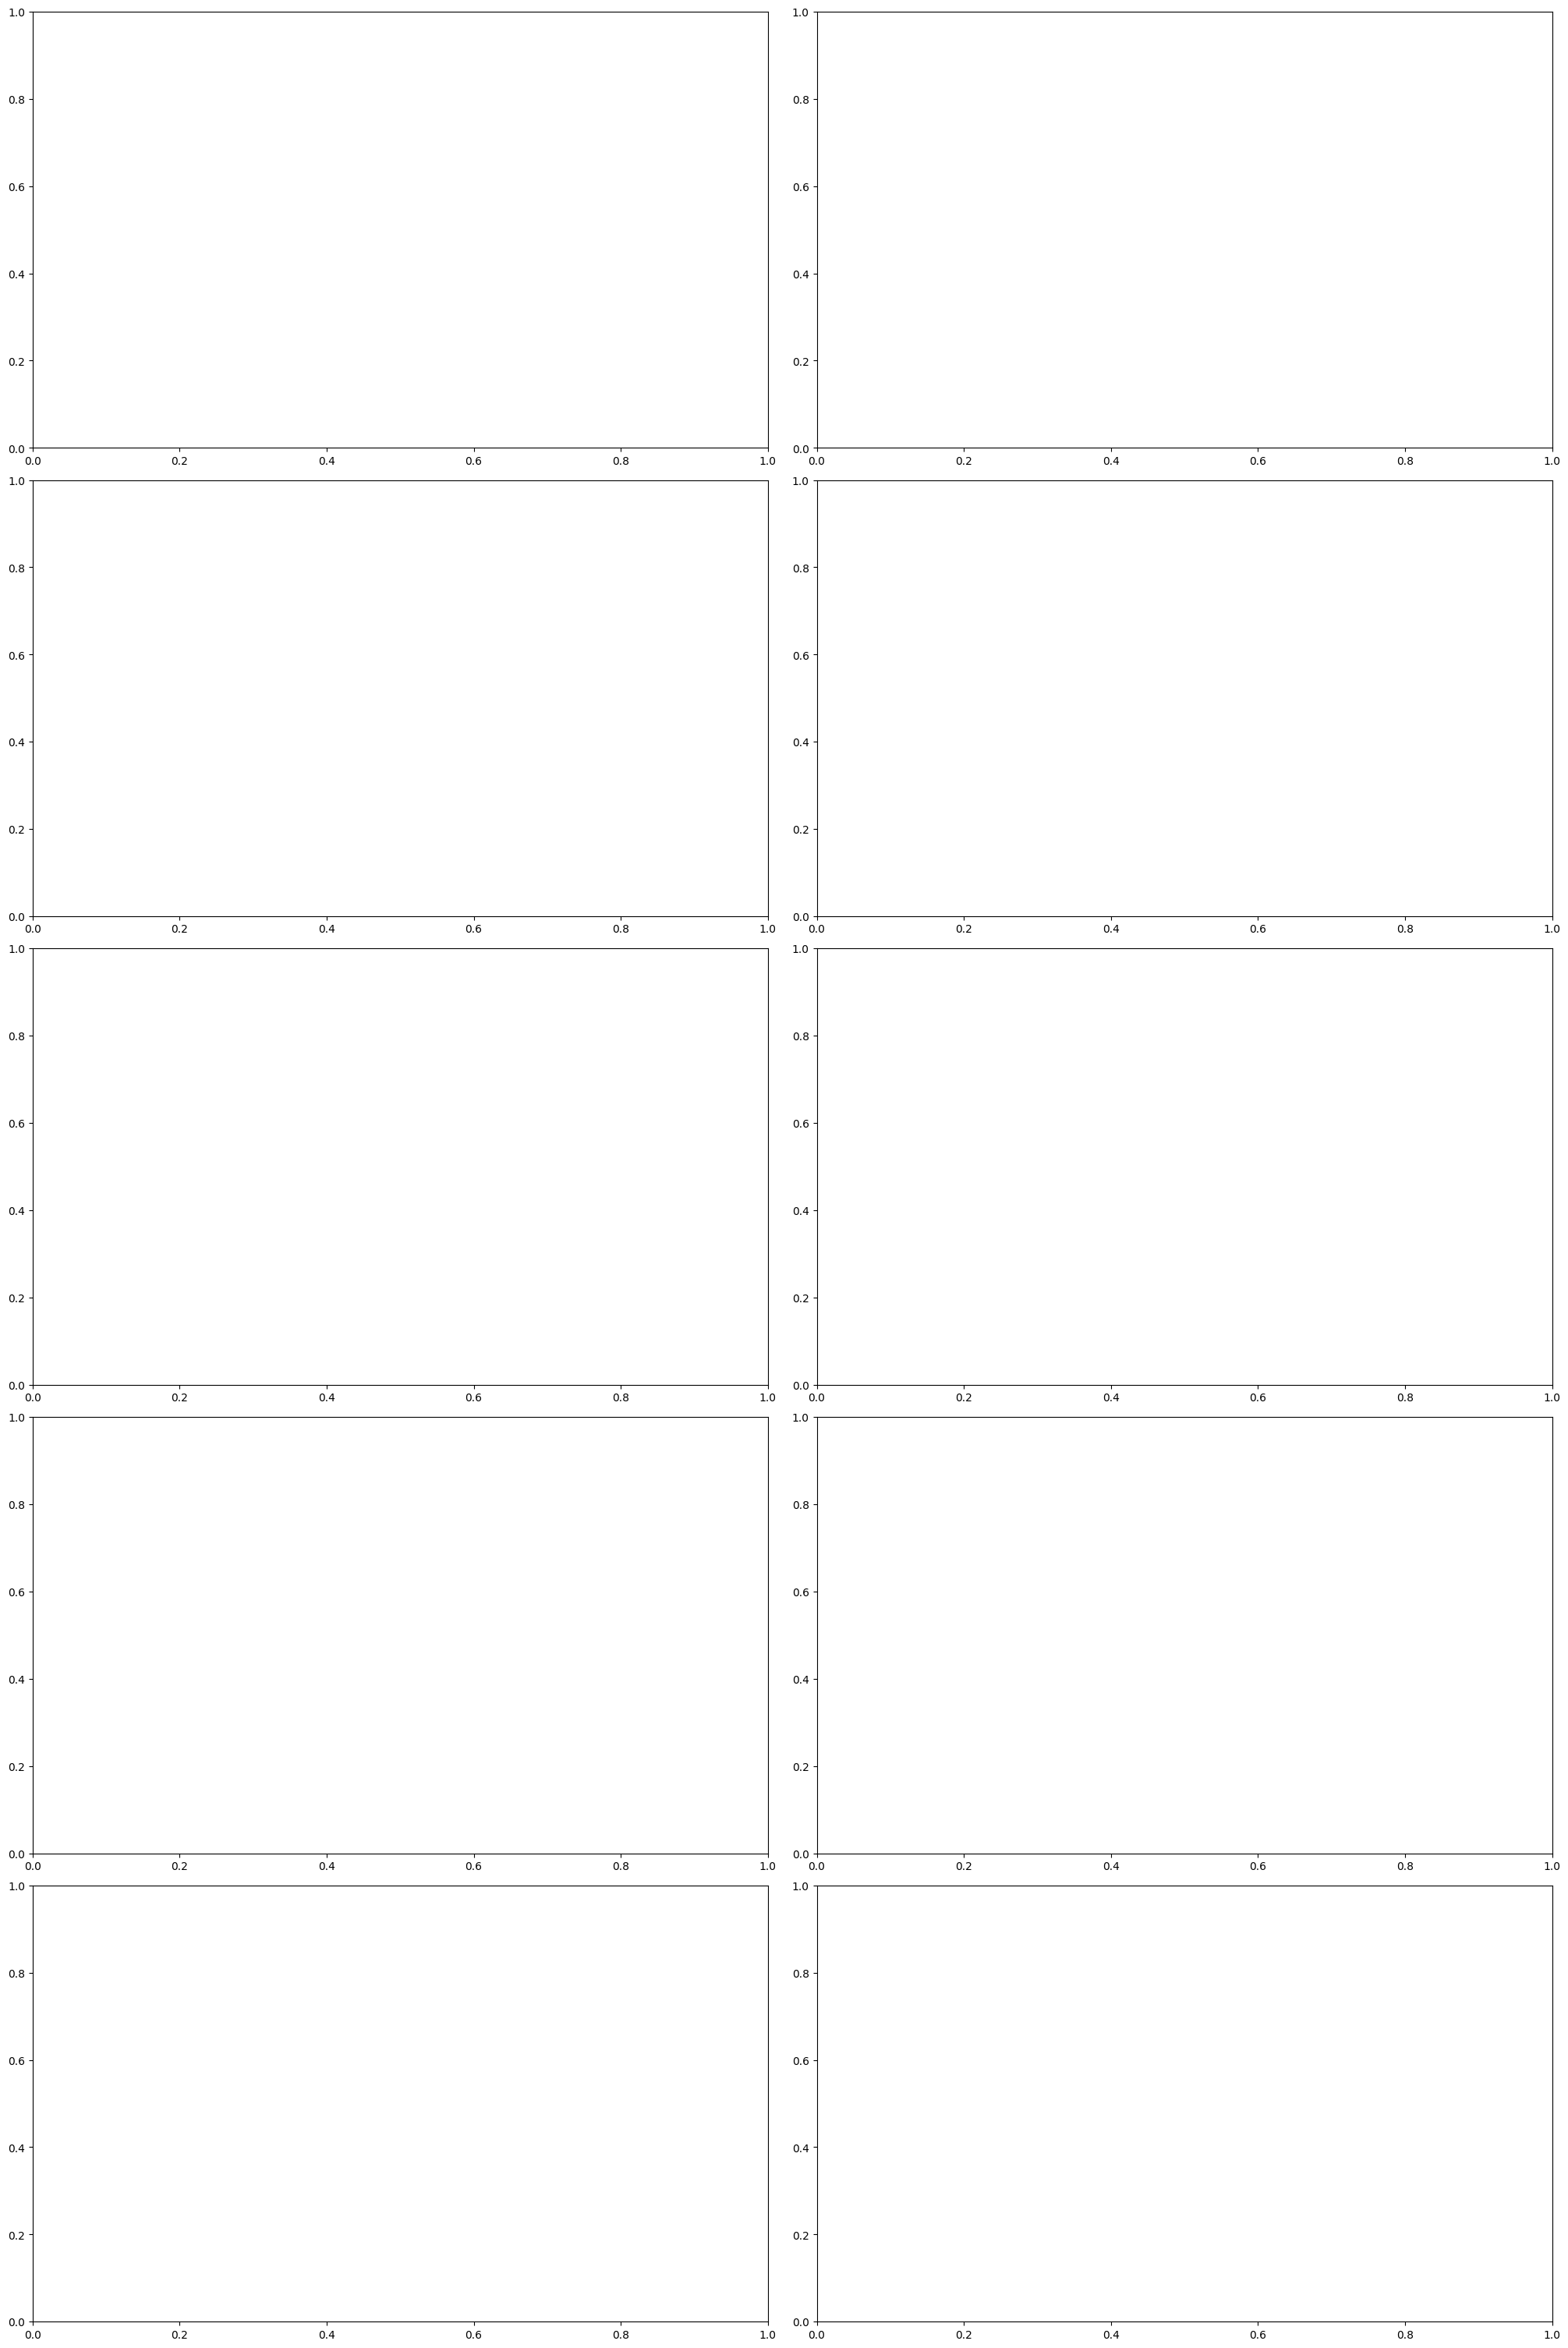

In [203]:

palette = {
    'BiLSTM-Partial-CRF': '#1f77b4',
    'EER-PubMedBERT-CRF': 'green',
    'TS-PubMedBERT-Partial-CRF': 'red'
}


def ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,dataframe,column_y):
    cur_data=dataframe[(dataframe['entity_removal_method']==entity_removal_algorithm) &(dataframe['entity_name']==Entity_Category)]
    seaborn.lineplot(ax=ax,data=cur_data,style="Model",markers=True,dashes=False,x='entity_removal_rate',y=column_y,\
        hue='Model',err_style='band',palette=palette)
    abbr_algorithm=removal_algorithm_map[entity_removal_algorithm]
    ax.legend(loc='upper left',fontsize=15)
    ax.set_xlabel('Entity Removal Rate',fontsize=20)
    ax.set_ylabel(column_y.replace('_',' ').title(),fontsize=20)
    ax.set_xticks(np.arange(0,1.0,0.1))
    ax.tick_params(axis='x',labelsize=15)
    ax.tick_params(axis='y',labelsize=20)
    ax.set_title(f'Entity Type: {entity_type_map[Entity_Category]}; Entity Removal Scheme: {abbr_algorithm}',fontsize=20)
fig,axs=plt.subplots(nrows=5,ncols=2,figsize=(20,30),constrained_layout=True)
category_algorithm_combination=[[Entity_Category,entity_removal_algorithm] for Entity_Category in Entity_Category_list for entity_removal_algorithm in entity_removal_algorithm_list]
for ax,combi in zip(axs.flat,category_algorithm_combination):
        Entity_Category=combi[0]
        entity_removal_algorithm=combi[1]
        print(f'current entity category is {Entity_Category}, current entity removal algorithm is {entity_removal_algorithm}')
        ax_plot_figure(ax,Entity_Category,entity_removal_algorithm,all_baselines[all_baselines['Model']!='PubMedBERT'],column_y='misguidance_rate')
plt.savefig(f"figures/misguidance_rate.pdf",dpi=1000)


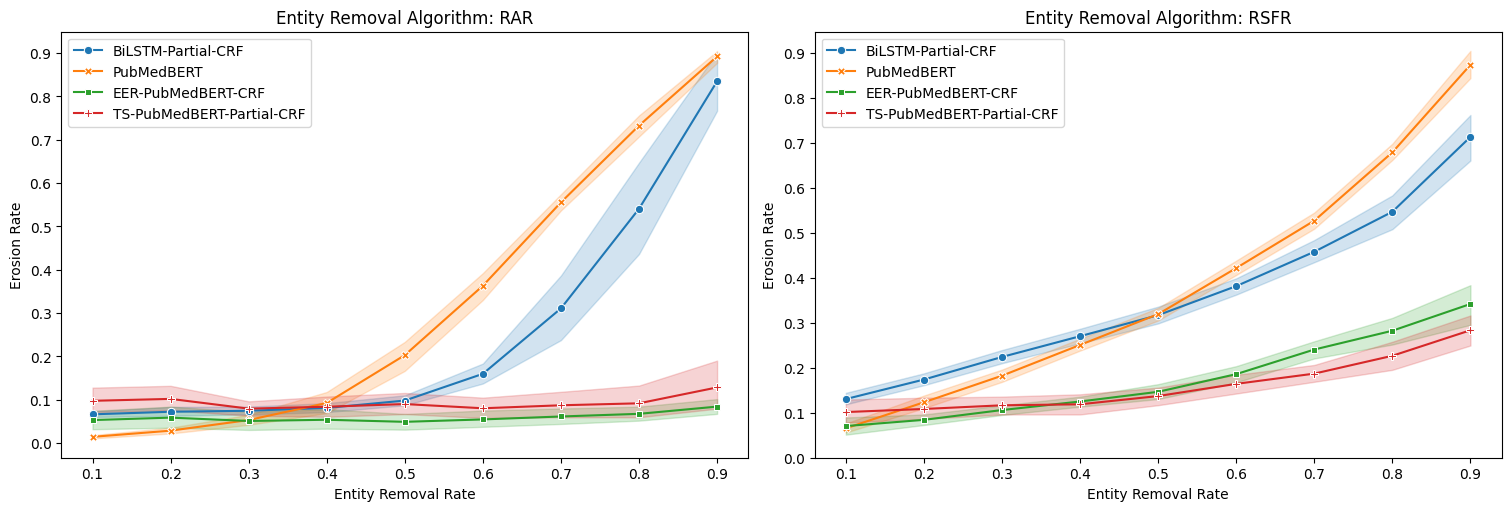

In [ ]:

def plot_figure_aggragate_entity_name(entity_removal_algorithm,ax,dataframe,column_y):
    seaborn.lineplot(data=dataframe[(dataframe['entity_removal_method']==entity_removal_algorithm)],style="Model",\
        markers=True,dashes=False,x='entity_removal_rate',y=column_y,hue='Model',err_style='band',\
            ax=ax,hue_order=all_baselines['Model'].unique())
    abbr_algorithm=removal_algorithm_map[entity_removal_algorithm]

    ax.legend(loc='upper left')
    ax.set_xlabel('Entity Removal Rate')
    ax.set_ylabel(column_y.replace('_',' ').title())
    ax.set_yticks(np.arange(0,1.0,0.1))
    ax.set_title(f'Entity Removal Algorithm: {abbr_algorithm}')
    

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),constrained_layout=True)
plot_figure_aggragate_entity_name("remove_surfaceforms_randomly",ax2,all_baselines,'erosion_rate')
plot_figure_aggragate_entity_name("remove_annotations_randomly",ax1,all_baselines,'erosion_rate')
plt.savefig(f"figures/erosion_rate_combi.pdf",dpi=1000)


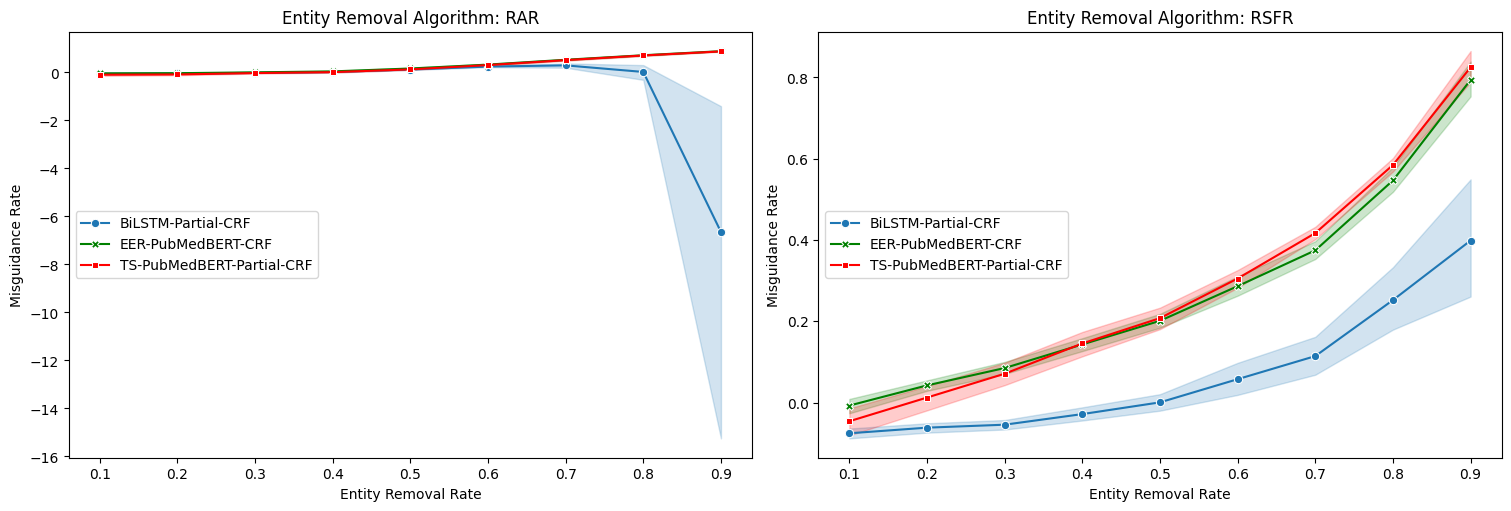

In [ ]:
from brokenaxes import brokenaxes
def plot_figure_aggragate_entity_name(entity_removal_algorithm,ax,dataframe,column_y):
    seaborn.lineplot(data=dataframe[(dataframe['entity_removal_method']==entity_removal_algorithm)],style="Model",\
        markers=True,dashes=False,x='entity_removal_rate',y=column_y,hue='Model',err_style='band',\
            ax=ax,palette=palette)
    abbr_algorithm=removal_algorithm_map[entity_removal_algorithm]

    ax.legend(loc='center left')
    ax.set_xlabel('Entity Removal Rate')
    ax.set_ylabel(column_y.replace('_',' ').title())
    # ax.set_yticks(np.arange(0,1.0,0.1))
    ax.set_title(f'Entity Removal Algorithm: {abbr_algorithm}')
    

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5),constrained_layout=True)
plot_figure_aggragate_entity_name("remove_surfaceforms_randomly",ax2,all_baselines[all_baselines['Model']!='PubMedBERT'],'misguidance_rate')
plot_figure_aggragate_entity_name("remove_annotations_randomly",ax1,all_baselines[all_baselines['Model']!='PubMedBERT'],'misguidance_rate')
plt.savefig(f"figures/misguidance_rate_combi.pdf",dpi=1000)


In [ ]:
all_baselines

,entity_name,entity_removal_method,entity_removal_rate,number_of_annotations,number_of_surfaceforms,number_of_entity_annotations_after_removal,number_of_surfaceforms_after_removal,test_precision,test_recall,test_f1,seed,Model,erosion_rate,misguidance_rate
0,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23111.0,0.694386,0.774218,0.732132,42,BiLSTM-Partial-CRF,0.056811,-0.052824
1,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23031.0,0.697964,0.767470,0.731069,42,BiLSTM-Partial-CRF,0.058181,-0.054356
2,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23158.0,0.697089,0.764403,0.729196,42,BiLSTM-Partial-CRF,0.060594,-0.057064
3,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23062.0,0.691741,0.775185,0.731090,42,BiLSTM-Partial-CRF,0.058154,-0.054326
4,Gene,remove_annotations_randomly,0.1,82803.0,28109.0,74523.0,23026.0,0.701582,0.767046,0.732855,42,BiLSTM-Partial-CRF,0.055880,-0.051786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,Disease,remove_surfaceforms_randomly,0.9,NaN,NaN,NaN,NaN,0.792623,0.750867,0.771180,30,TS-PubMedBERT-Partial-CRF,0.094533,0.836032
1796,Disease,remove_surfaceforms_randomly,0.9,NaN,NaN,NaN,NaN,0.779184,0.738864,0.758488,40,TS-PubMedBERT-Partial-CRF,0.109434,0.833289
1797,Disease,remove_surfaceforms_randomly,0.9,NaN,NaN,NaN,NaN,0.765650,0.642705,0.698811,10,TS-PubMedBERT-Partial-CRF,0.179504,0.819052
1798,Disease,remove_surfaceforms_randomly,0.9,NaN,NaN,NaN,NaN,0.718091,0.658042,0.686756,20,TS-PubMedBERT-Partial-CRF,0.193658,0.815876


In [ ]:
main_result=all_baselines.groupby(by=['entity_name','entity_removal_method','entity_removal_rate','Model']).agg(["mean",lambda x:1.96*x.sem()])[['erosion_rate','misguidance_rate']]
main_result.columns=['mean_erosion_rate','ci95_erosion_rate','mean_misguidance_rate','ci95_misguidance_rate']
main_result['Erosion']=main_result['mean_erosion_rate'].map(lambda x: '%.2f'%(x*100))+"±"+main_result['ci95_erosion_rate'].map(lambda x: '%.2f'%(x*100))
main_result['Misguidance']=main_result['mean_misguidance_rate'].map(lambda x: '%.2f'%(x*100))+"±"+main_result['ci95_misguidance_rate'].map(lambda x: '%.2f'%(x*100))


In [ ]:
main_result

mean_erosion_rate  \
entity_name entity_removal_method        entity_removal_rate Model                                          
CellLine    remove_annotations_randomly  0.1                 BiLSTM-Partial-CRF                  0.097200   
                                                             EER-PubMedBERT-CRF                  0.107924   
                                                             PubMedBERT                          0.025826   
                                                             TS-PubMedBERT-Partial-CRF           0.152852   
                                         0.2                 BiLSTM-Partial-CRF                  0.121505   
...                                                                                                   ...   
Species     remove_surfaceforms_randomly 0.8                 TS-PubMedBERT-Partial-CRF           0.181961   
                                         0.9                 BiLSTM-Partial-CRF                  0.721400   
                                                             EER-PubMedBERT-CRF                  0.297956   
                                                             PubMedBERT                          0.804651   
                                                             TS-PubMedBERT-Partial-CRF           0.263753   

                                                                                        ci95_erosion_rate  \
entity_name entity_removal_method        entity_removal_rate Model                                          
CellLine    remove_annotations_randomly  0.1                 BiLSTM-Partial-CRF                  0.015773   
                                                             EER-PubMedBERT-CRF                  0.016509   
                                                             PubMedBERT                          0.011904   
                                                             TS-PubMedBERT-Partial-CRF           0.115666   
                                         0.2                 BiLSTM-Partial-CRF                  0.012270   
...                                                                                                   ...   
Species     remove_surfaceforms_randomly 0.8                 TS-PubMedBERT-Partial-CRF           0.028385   
                                         0.9                 BiLSTM-Partial-CRF                  0.048033   
                                                             EER-PubMedBERT-CRF                  0.019655   
                                                             PubMedBERT                          0.044558   
                                                             TS-PubMedBERT-Partial-CRF           0.045675   

                                                                                        mean_misguidance_rate  \
entity_name entity_removal_method        entity_removal_rate Model                                              
CellLine    remove_annotations_randomly  0.1                 BiLSTM-Partial-CRF                     -0.079405   
                                                             EER-PubMedBERT-CRF                     -0.092420   
                                                             PubMedBERT                             -0.000158   
                                                             TS-PubMedBERT-Partial-CRF              -0.175318   
                                         0.2                 BiLSTM-Partial-CRF                     -0.071374   
...                                                                                                       ...   
Species     remove_surfaceforms_randomly 0.8                 TS-PubMedBERT-Partial-CRF               0.542980   
                                         0.9                 BiLSTM-Partial-CRF                      0.277036   
                                                             EER-PubMedBERT-CRF                      0.721514   
         

In [ ]:
main_result.reset_index().to_csv('data/erosion_misguidance_res.csv',index=False)